In [1]:

from app.dataset.dataset import Dataset
from app.dataset.utils.dataset_splitter import SignerDatasetSplitter
from app.features.plotter.frames_plotter import plot_frames

dataset = Dataset("data/WLASL_v0.3.json")

In [2]:
videos = dataset.videos
len(videos)

11979

In [3]:
signers = [video.signer_id for video in videos]
len(signers)

11979

In [4]:
splitter = SignerDatasetSplitter(videos[:1], frames_split=0.3)
train_frames, val_frames, test_frames = splitter.train_test_split(test_size=0.2, val_size=0.2, random_state=42)
augmented_train_frames = splitter.apply_data_augmentation(train_frames, num_augmentations=3)

In [5]:
print(len(train_frames))
print(len(augmented_train_frames))
print(len(val_frames))
print(len(test_frames))

14
56
4
5


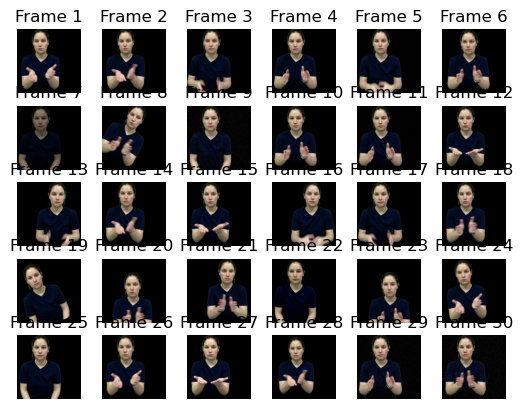

In [6]:
plot_frames([signer_frame.frame for signer_frame in augmented_train_frames[:30]])

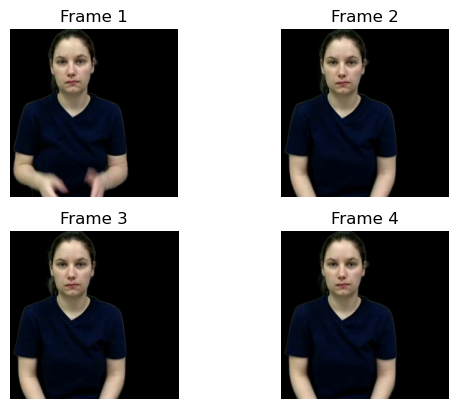

In [7]:
plot_frames([signer_frame.frame for signer_frame in val_frames])

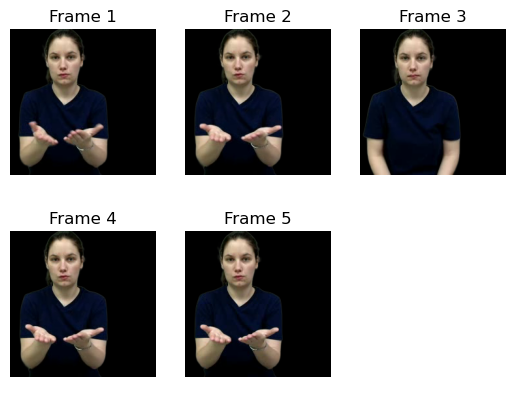

In [8]:
plot_frames([signer_frame.frame for signer_frame in test_frames])